SVC: Support Vector Classifier from scikit-learn (used to create the SVM model).

make_circles: Generates non-linearly separable 2D circular data (like a donut).

matplotlib.pyplot: For plotting the decision boundary and data.

numpy: For numerical operations and creating a grid for plotting.

In [2]:
# Non-linearly separable data
X, y = make_circles(n_samples=200, noise=0.1, factor=0.5)

Creating data:

n_samples=200: Generate 200 total samples.

factor=0.5: Ratio of inner to outer circle radius.

noise=0.1: Adds a little randomness to the points for realism.

📌 This produces two concentric circles — not linearly separable!

Training the SVM:

SVC(kernel='rbf'): We use the Radial Basis Function (RBF) kernel, which can map circular patterns into a higher-dimensional space.

clf.fit(X, y): Trains the SVM on your data.

🧠 Internally, the SVM finds the optimal non-linear decision boundary that separates the two circles using the kernel trick.

Plotting the Decision Boundary:

X[:, 0].min()  → leftmost x-point
X[:, 0].max()  → rightmost x-point

X[:, 1].min()  → bottom y-point
X[:, 1].max()  → top y-point
np.linspace(start, stop, num)
Creates num evenly spaced values between start and stop.

meshgrid:
X:
[[1 2 3]
 [1 2 3]]

Y:
[[10 10 10]
 [20 20 20]]
🔍 Interpretation:
Each element of the grid corresponds to a point (X[i,j], Y[i,j]). So:

X[0,0] = 1, Y[0,0] = 10 → coordinate (1, 10)

X[1,2] = 3, Y[1,2] = 20 → coordinate (3, 20)

Original:
[[1 2]
 [3 4]]

Flattened:
[1 2 3 4]


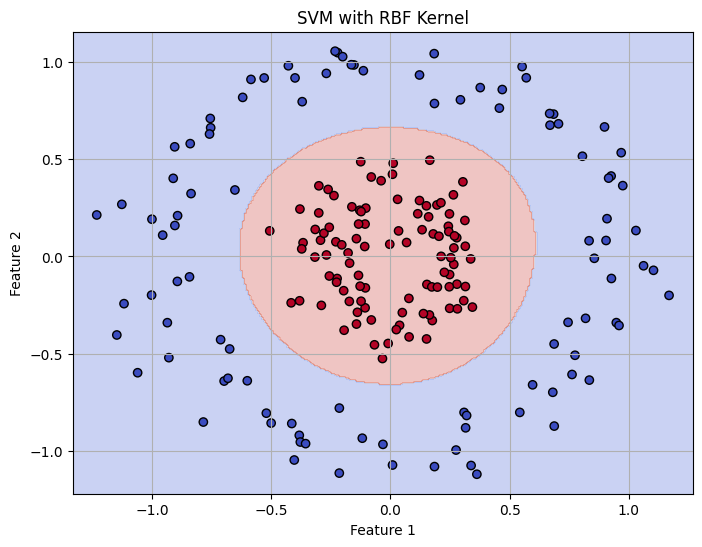

In [20]:
from sklearn.svm import SVC
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt
import numpy as np

# Generate non-linearly separable circular data
X, y = make_circles(n_samples=200, noise=0.1, factor=0.3, random_state=0)

# Train the SVM model using RBF kernel
clf = SVC(kernel='rbf')
clf.fit(X, y)

# Function to plot the decision boundary
def plot_decision_boundary(model, X, y):
    # Define grid range
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    # Create meshgrid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                         np.linspace(y_min, y_max, 300))

    # Predict using trained model on each point in mesh
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot contour and data points
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
    plt.title("SVM with RBF Kernel")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.grid(True)
    plt.show()

# Call the function to plot
plot_decision_boundary(clf, X, y)

In [18]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score

# Step 1: Create a sample dataset
X, y = make_classification(n_samples=1000, n_features=10, n_classes=2,
                           n_informative=5, n_redundant=2, random_state=42)

# Step 2: Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Random Forest ---
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
print("=== Random Forest ===")
print(classification_report(y_test, rf_pred))
print("F1 Score:", f1_score(y_test, rf_pred))

# --- SVM ---
svm_model = SVC(kernel='rbf')  # You can also try linear kernel
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
print("\n=== Support Vector Machine ===")
print(classification_report(y_test, svm_pred))
print("F1 Score:", f1_score(y_test, svm_pred))

# --- Logistic Regression ---
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
print("\n=== Logistic Regression ===")
print(classification_report(y_test, log_pred))
print("F1 Score:", f1_score(y_test, log_pred))

=== Random Forest ===
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       112
           1       0.93      0.94      0.94        88

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.95      0.94      0.95       200

F1 Score: 0.9378531073446328

=== Support Vector Machine ===
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       112
           1       0.91      0.91      0.91        88

    accuracy                           0.92       200
   macro avg       0.92      0.92      0.92       200
weighted avg       0.92      0.92      0.92       200

F1 Score: 0.9090909090909091

=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.86      0.85      0.85       112
           1       0.81      0.82      0.81        88

    accuracy                           0.